## Student Full Name : Yassine Zohair
## Student Number : 2025118
## Module Title :Strategic Thinking
## Lecturer Name: Taufique Ahmed
## Assessment Title : CA 3 Final Submission

This project focuses on reviewing and analysing what has been learned during the Higher Diploma in Data Analytics for Business at CCT College.

## Importing necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import math
from scipy import stats
from scipy.stats import norm
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from shapash.explainer.smart_explainer import SmartExplainer
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Dictionary:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 

PAY_3: Repayment status in July, 2005

PAY_4: Repayment status in June, 2005

PAY_5: Repayment status in May, 2005

PAY_6: Repayment status in April, 2005

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

defaulted: Default payment (1=yes, 0=no)


In [7]:
# loading the data
df = pd.read_csv('credit-card-default.xls')

## 1. Data Understanding
## 1.1 Overview of the dataset
display the first and last 5 rows to preview the data

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


checking the number of features and observations in the dataset

In [11]:
df.shape

(30000, 25)

The dataset consists of 30000 rows and 25 columns

checking the informomation contained in the dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

we can see that all features are of type int64, suggesting that categorical variables (SEX, EDUCATION,MARRIAGE) are encoded as integers.

In [16]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


The mean and median values for features like LIMIT_BAL and AGE are close that suggest a normal distrubution .
For payment amounts, the mean is much higher than the median that indicate a skewed data.

i will drop unrelevant column 'ID' because it is not provide any infomation for analysis.

In [19]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'defaulted'],
      dtype='object')

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


## 1.2 EDA

I will drop unrelevant column 'ID' because it is not provide any infomation for analysis.

In [23]:
df = df.drop(columns=['ID'])

we can see that the repayment status is indicated in columns PAY_0, PAY_2 ... with no PAY_1 column, so we rename PAY_0 to PAY_1 for easy understanding. 

In [25]:
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

## 1.2.1 Column: "defaulted"

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


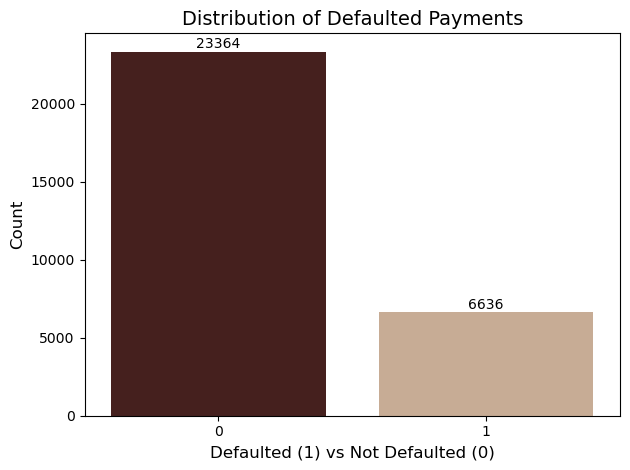

In [27]:
# Custom colors
colors = ['#4B1A18', '#CFAB8D']

ax = sns.countplot(x='defaulted', data=df, palette=colors)

# Add title and labels
plt.title('Distribution of Defaulted Payments', fontsize=14)
plt.xlabel('Defaulted (1) vs Not Defaulted (0)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [28]:
default_percentage = df['defaulted'].value_counts(normalize=True) * 100
default_percentage

defaulted
0    77.88
1    22.12
Name: proportion, dtype: float64

From the graph, we can see that there are far fewer default payments than non-default payments. There are 6,636 customers who defaulted and 23,364 who did not. This means 22.1% of customers defaulted, while 77.9% made their payments on time. The data is therefore imbalanced, and I will handle this issue later in the feature engineering process.

## 1.2.2 Column: 'LIMIT_BAL'

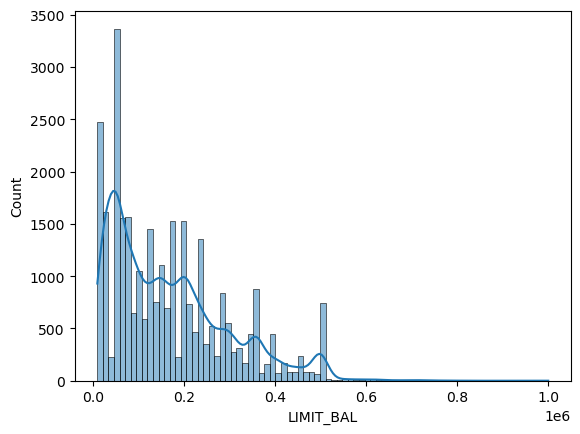

In [31]:
sns.histplot(df['LIMIT_BAL'], kde=True)
plt.show()

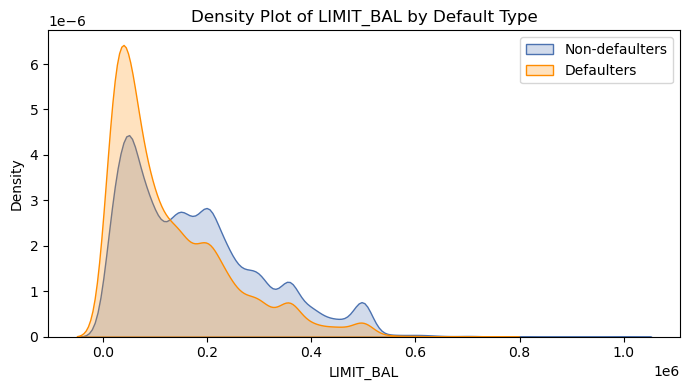

In [32]:
sns.set_palette("deep")
# Split data by default type
class_0 = df[df['defaulted'] == 0]['LIMIT_BAL']
class_1 = df[df['defaulted'] == 1]['LIMIT_BAL']

# Create plot
plt.figure(figsize=(7, 4))
sns.kdeplot(class_0, fill=True, label='Non-defaulters')
sns.kdeplot(class_1, fill=True, label='Defaulters', color='darkorange')
plt.title('Density Plot of LIMIT_BAL by Default Type')
plt.xlabel('LIMIT_BAL')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


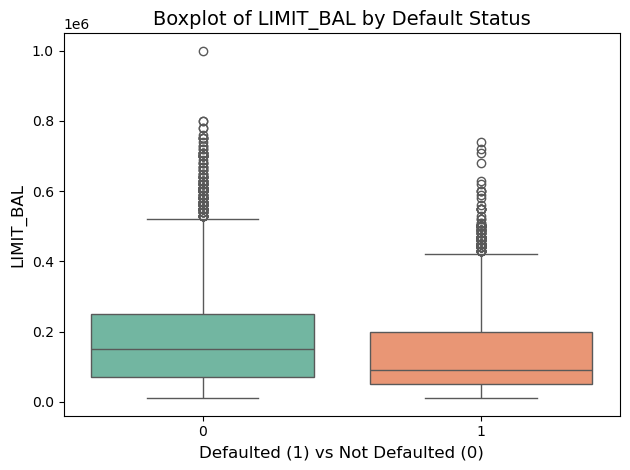

In [33]:
ax = sns.boxplot(x="defaulted", y="LIMIT_BAL", data=df, palette="Set2")
plt.title("Boxplot of LIMIT_BAL by Default Status", fontsize=14)
plt.xlabel("Defaulted (1) vs Not Defaulted (0)", fontsize=12)
plt.ylabel("LIMIT_BAL", fontsize=12)

plt.tight_layout()
plt.show()

For the feature LIMIT_BAL, I created a density plot based on the default type. I observed that when the credit limit is below approximately 140,000, the probability of default is higher than that of non-default. This indicates that customers with lower credit limits are more likely to default, while those with higher credit limits are less likely to do so. I believe this makes sense because higher credit limits are usually given to individuals with stronger creditworthiness and a lower risk of default.

## 1.2.3 Column: 'SEX'

In [36]:
gender_counts = df['SEX'].value_counts()
gender_counts

SEX
2    18112
1    11888
Name: count, dtype: int64

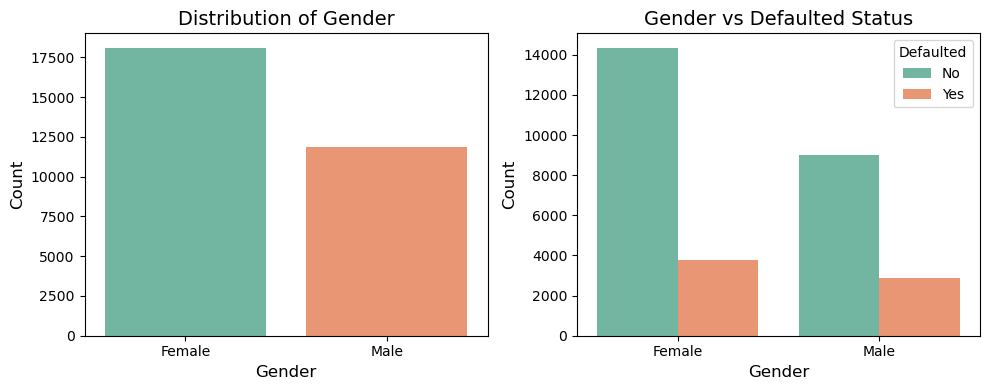

In [37]:
gender_labels = {1: 'Male', 2: 'Female'}

plt.figure(figsize=(10, 4))

# First plot: Gender distribution
plt.subplot(1, 2, 1)
sns.countplot(x=df['SEX'].map(gender_labels), palette='Set2')
plt.title('Distribution of Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Second plot: Gender vs Defaulted
plt.subplot(1, 2, 2)
sns.countplot(x=df['SEX'].map(gender_labels), hue=df['defaulted'], palette='Set2')
plt.title('Gender vs Defaulted Status', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Defaulted', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

From the graph, I observed that there are 18,112 females and 11,888 males in the dataset. Although the number of defaulting males is smaller, the proportion is higher. This might be because males generally have lower credit limits than females, which can also be seen from the graph.

## 1.2.4 Column: 'EDUCATION'

In [40]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [41]:
df['EDUCATION'] = df['EDUCATION'].replace(to_replace=[0, 5, 6], value=4)
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

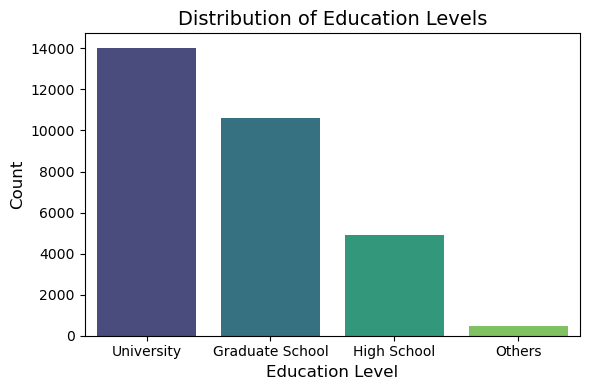

In [42]:
education_labels = {
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others'
}

plt.figure(figsize=(6, 4))
sns.countplot(x=df['EDUCATION'].map(education_labels), palette='viridis')

plt.title('Distribution of Education Levels', fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


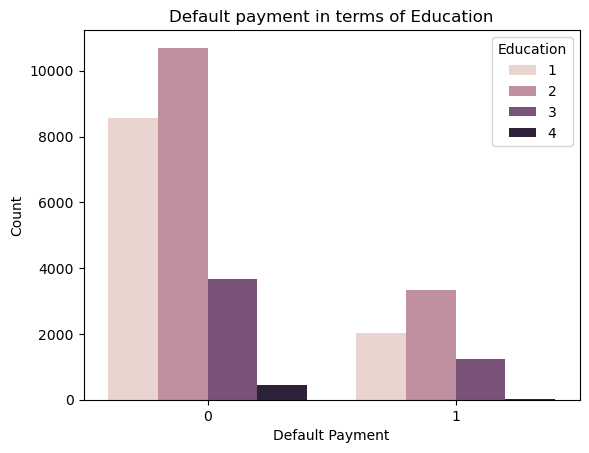

In [43]:
sns.countplot(x='defaulted', hue='EDUCATION', data=df)
plt.title('Default payment in terms of Education')
plt.xlabel('Default Payment')
plt.ylabel('Count')
plt.legend(title='Education')
plt.show()

From the graph, I observed that there are 10,585 customers with graduate school degrees, 14,030 with university (college) degrees, and 4,917 with high school degrees. The highest number of customers have university degrees, followed by those from graduate schools and then high schools. I also noticed that as the level of education increases, the proportion of defaults decreases.

## 1.2.5 Column: 'MARRIAGE'

In [46]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [47]:
df['MARRIAGE'] = df['MARRIAGE'].replace(to_replace=[0], value=3)
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

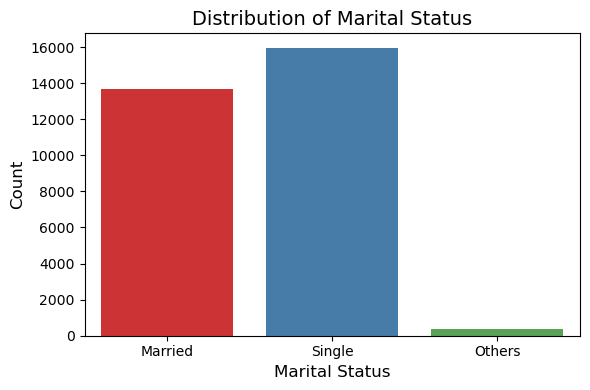

In [48]:
marriage_labels = {
    1: 'Married',
    2: 'Single',
    3: 'Others'
}

plt.figure(figsize=(6, 4))
sns.countplot(x=df['MARRIAGE'].map(marriage_labels), palette='Set1')

plt.title('Distribution of Marital Status', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


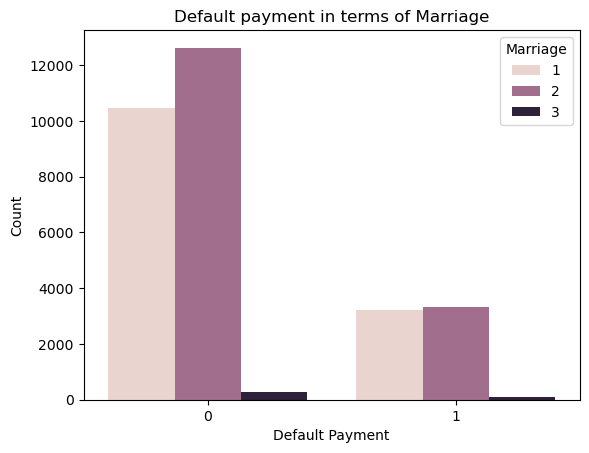

In [49]:
sns.countplot(x='defaulted', hue='MARRIAGE', data=df)
plt.title('Default payment in terms of Marriage')
plt.xlabel('Default Payment')
plt.ylabel('Count')
plt.legend(title='Marriage')
plt.show()

Single people are the largest group and have the most defaults, but married  have  higher chance of defaulting as well. The others group is very small.

## 1.2.6 Column: 'AGE'

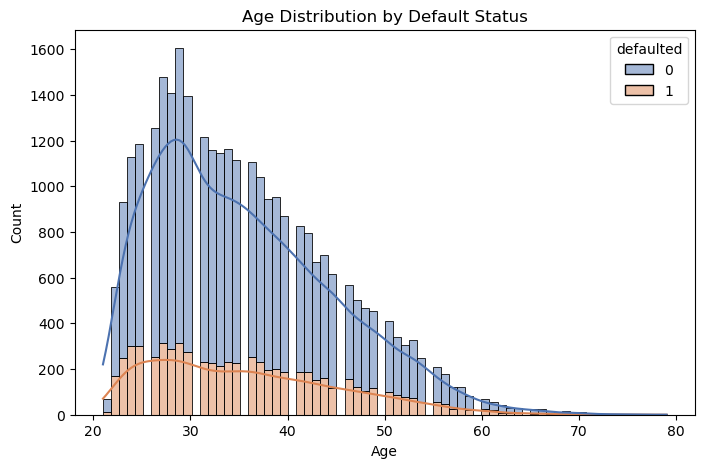

In [52]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="AGE", hue="defaulted", kde=True, multiple="stack")
plt.title('Age Distribution by Default Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

the distrubution is slightly right skewed. That means most of people are younger, we can constate that younger people default more. 

Also,I observed that as age increases, the number of customers decreases. Most customers belong to the 20–30 age group, followed by those in the 30–40 age group. I also noticed that as age increases, the number of default payments tends to decrease.

## 1.2.7 Correlation Matrix of Features

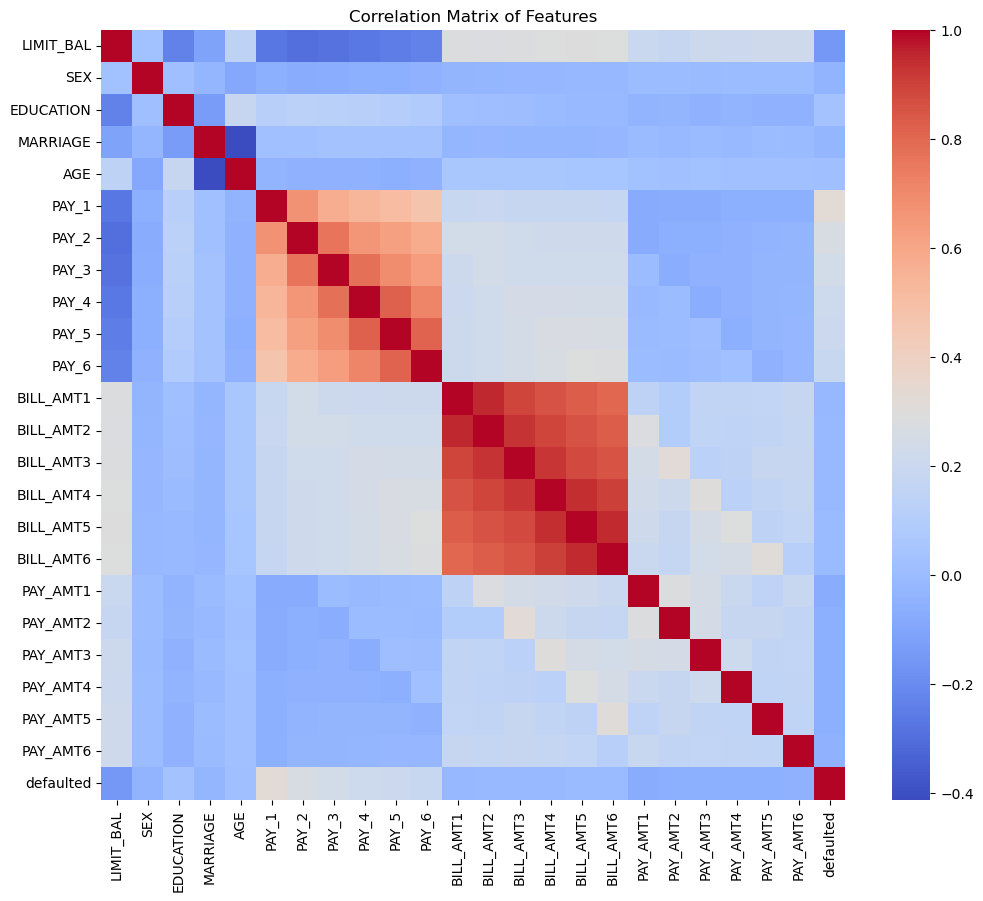

In [56]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

The heatmap shows how features (Pay, Bill_AMT, Pay_Amt) have a good correlation between themselves. Those features also show some correlation with Limit_Bal.

## 2.  Data Cleaning

## 2.1 Missing values : 

In [60]:
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulted    0
dtype: int64

the dataset has no missing values

## 2.2 Duplicate Values :

In [63]:
df.duplicated().sum()

35

the dataset has 35 duplicated rows. I'm going to drop them to ensure data quality.

In [65]:
df.drop_duplicates()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# 2.3 Skewness

From the statistical summary of the numerical features, I noticed a large gap between the 75th percentile and the maximum value. This suggests that the dataset is skewed and includes some outliers.

In [68]:
numerical_features = []
categorical_features = []

# splitting features into numeric and categoric.
#If feature has more than 15 categories we will consider it as numerical_features, remaining features will be added to categorical_features.
for col in df.columns:  
  if df[col].nunique() > 15:
    numerical_features.append(col) 
  else:
    categorical_features.append(col) 

print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
Categorical Features : ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'defaulted']


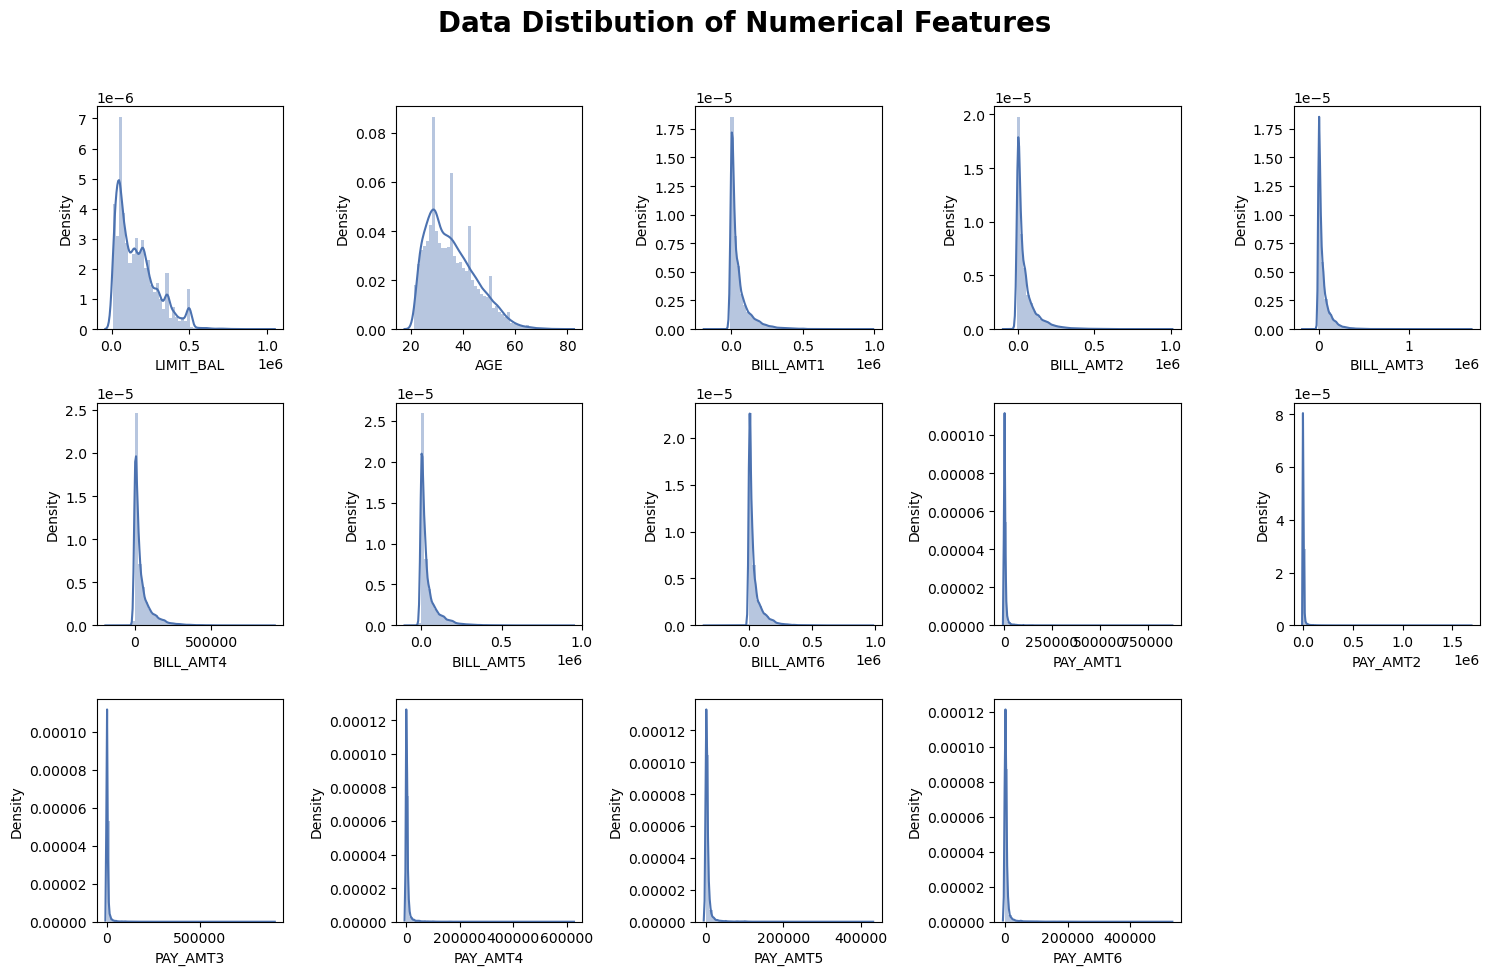

In [69]:
# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(4, 5, i+1)                       # subplots 4 rows, 5 columns

  # dist plots
  sns.distplot(df[col])  
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()    
     

For the numerical features, I observed that most of the distributions are right-skewed. Some variables are highly skewed to the right, indicating the presence of many outliers and some may approach a normal distribution. Therefore, it seems necessary to remove the outliers before applying any transformation. First, I will remove the outliers and then check whether further transformation techniques are required.

# 2.4 Handling Outlier

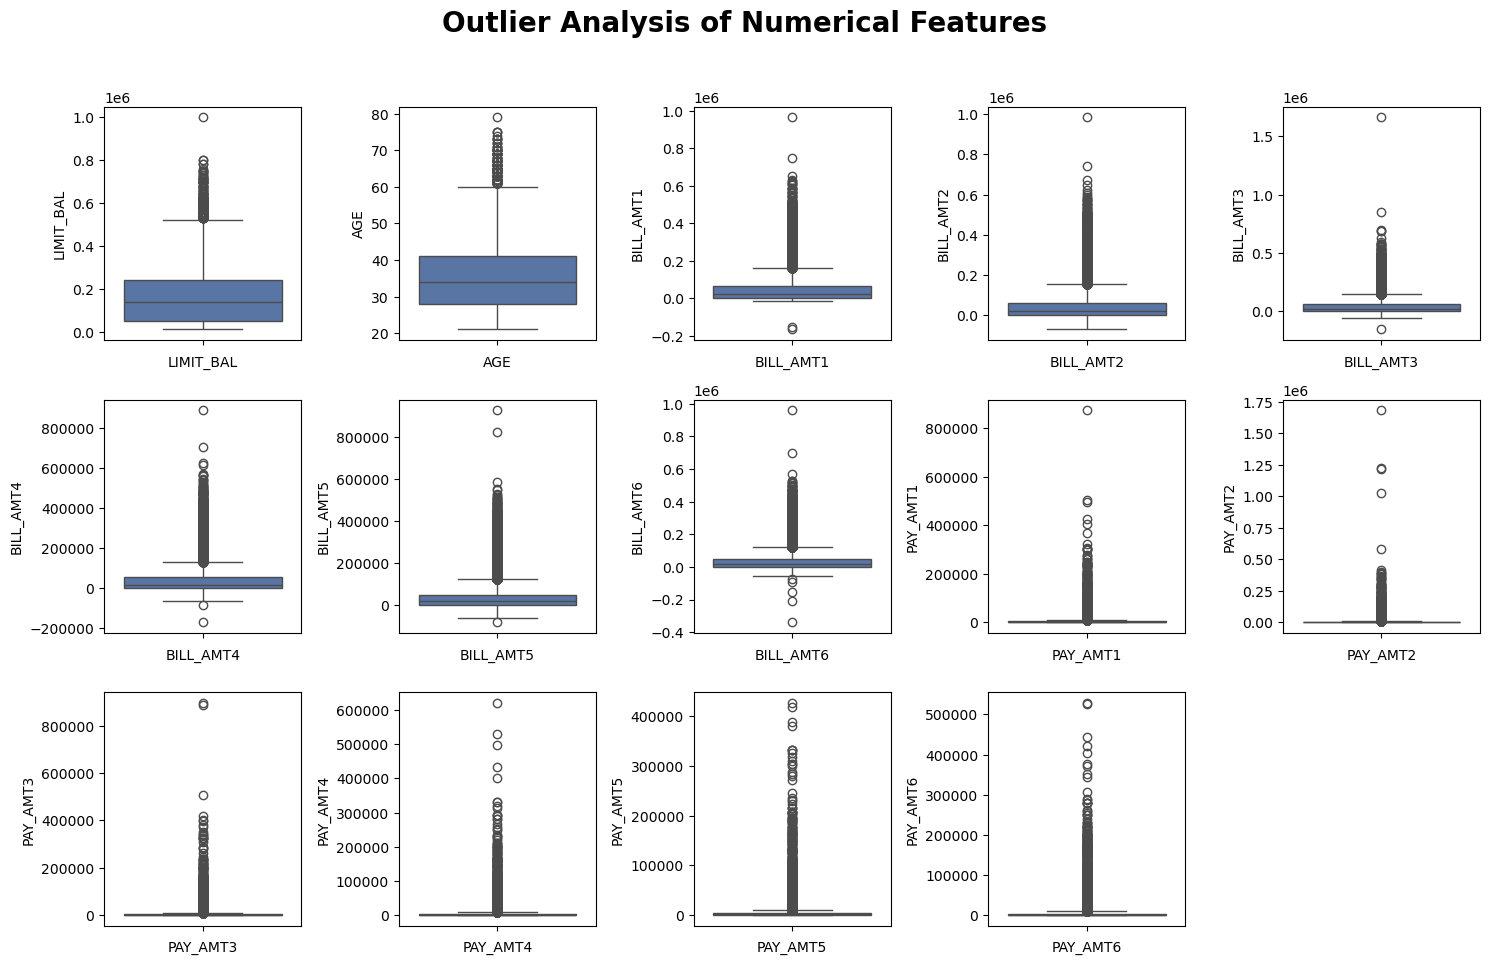

In [72]:
# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(4, 5, i+1)            # subplot of 4 rows and 5 columns

  # countplot
  sns.boxplot(df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

From the graph, I observed that outliers are present in all the bill amount features, all the pay amount features, and in the ‘LIMIT_BAL’ column. To address this issue, I used the clipping method, which involves setting a cap for extreme values. In this approach, any data point that exceeds a defined upper or lower threshold is considered an outlier and replaced with the nearest boundary value—either the minimum or maximum within the specified range. This helps to reduce the impact of extreme values while preserving the overall structure of the data.

In [74]:
# replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(df):
    for col in df[numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # replacing the outliers with upper and lower bound
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df
     

In [75]:
# using the function to treat outliers
df = clip_outliers(df)

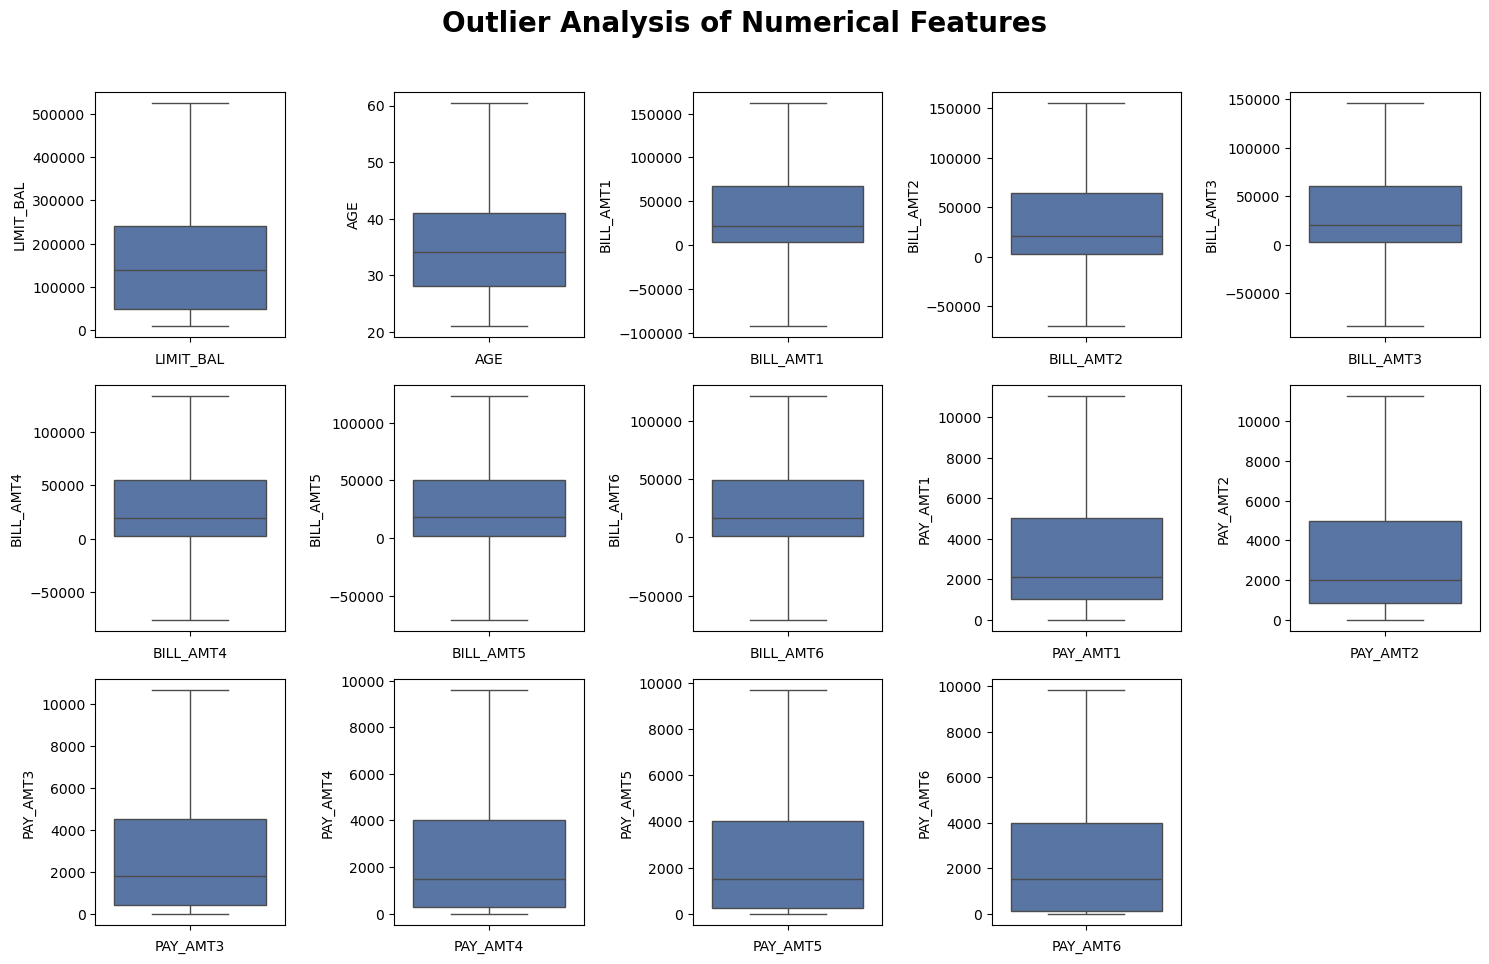

In [76]:
# checking the boxplot after outlier treatment
# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(4, 5, i+1)            # subplot of 4 rows and 5 columns

  # countplot
  sns.boxplot(df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

After removing the outliers, I noticed some changes in the data distribution. Some features that were skewed before became almost normally distributed. Because of this improvement, I decided not to use any extra transformation methods on the numerical feature

## 3. Hypothesis Testing

Based on the exploratory data analysis and visualizations, I formulated two hypothetical statements using the dataset. In the following three sections, I performed hypothesis testing through code implementation and statistical analysis to draw final conclusions about each statement.

## 3.1 Hypothesis 1: Age of Non-Defaulting Male Customers

Statement: Men who did not default have an average age of at least 40 years.

Null Hypothesis (H₀): μ = 40  
Alternative Hypothesis (H₁):** μ < 40  

In [82]:
# Select subset of data
hypo_1 = df[(df['SEX'] == 1) & (df['defaulted'] == 0)]

# Set hypothesis value
hypothesis_number = 40

# Calculate sample statistics
sample_mean = hypo_1['AGE'].mean()
sample_std = hypo_1['AGE'].std()
sample_size = len(hypo_1)

# Calculate Z value
z_value = (sample_mean - hypothesis_number) * math.sqrt(sample_size) / sample_std

# Calculate P-value (left-tailed test)
p_value = norm.cdf(z_value)

# Conclusion
significance_level = 0.05
if p_value > significance_level:
    print(f"Failed to reject the Null Hypothesis (p = {p_value})")
else:
    print(f"Null Hypothesis rejected (p = {p_value})")


Null Hypothesis rejected (p = 1.224874903389824e-307)


I used a Z-Test as the statistical method to calculate the p-value. The results showed that the null hypothesis was rejected, indicating that the average age of male customers who did not default is significantly different from 40 years.

## 3.2 Hypothesis 2: Credit Limit of Defaulting Customers

Statement: Customers who defaulted have an average credit limit of less than 100,000.

Null Hypothesis (H₀): μ = 100,000  
Alternative Hypothesis (H₁): μ < 100,000  

In [86]:
# Filter dataset: customers who defaulted
hypo_2 = df[df["defaulted"] == 1]

# Hypothesized mean (credit limit)
hypothesis_number = 100000

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(hypo_2["LIMIT_BAL"], hypothesis_number)

# Right-tailed test adjustment (H1: mean > 100000)
if t_stat > 0:
    p_value = p_value / 2
else:
    p_value = 1 - (p_value / 2)

# Significance level and conclusion
significance_level = 0.05
if p_value > significance_level:
    print(f"Failed to reject the Null Hypothesis (p = {p_value})")
else:
    print(f"Null Hypothesis rejected (p = {p_value})")

print(f"T-statistic: {t_stat:.4f}")
print(f"Sample Mean: {hypo_2['LIMIT_BAL'].mean()}")


Null Hypothesis rejected (p = 1.9482813621936117e-97)
T-statistic: 21.2655
Sample Mean: 129885.87703435804


I used a T-Test to find the p-value. The results showed that the null hypothesis was rejected, meaning that customers who defaulted had an average credit limit lower than 100,000.

## 4. Feature Engineering

In a credit card dataset, negative bill amounts are not possible because a bill represents the amount of money a cardholder owes to the bank, which should always be a positive value. The presence of negative values may be the result of data entry errors or other inconsistencies. Therefore, I decided to remove all instances containing negative bill amounts from the dataset.

In [90]:
df['BILL_AMT1'].unique

<bound method Series.unique of 0          3913.000
1          2682.000
2         29239.000
3         46990.000
4          8617.000
            ...    
29995    162389.375
29996      1683.000
29997      3565.000
29998     -1645.000
29999     47929.000
Name: BILL_AMT1, Length: 30000, dtype: float64>

In [91]:
df = df[df['BILL_AMT1'] >= 0]

To make the features more suitable for machine learning models, I re-encoded. This helps maintain consistency with other binary features and ensures that models interpret the variable correctly.

In [93]:
df['SEX'] = df['SEX'].replace({1: 0, 2: 1})

In [94]:
df['EDUCATION'] = df['EDUCATION'].replace({1: 0, 2: 1,3: 2,4: 3})

In [95]:
df['MARRIAGE'] = df['MARRIAGE'].replace({1: 0,2: 1,3: 2})

In [96]:
df.dtypes

LIMIT_BAL      int64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE          float64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1       int64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5       int64
PAY_AMT6     float64
defaulted      int64
dtype: object

I only need to convert categorical_features types to object or category for proper representation in the dataset.

In [98]:
categorical_features.remove('defaulted')

In [99]:
# Cast values in the categorical columns as type str.                 
df[categorical_features] = df[categorical_features].astype(str)

# checking the result
df.dtypes

LIMIT_BAL      int64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE          float64
PAY_1         object
PAY_2         object
PAY_3         object
PAY_4         object
PAY_5         object
PAY_6         object
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1       int64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5       int64
PAY_AMT6     float64
defaulted      int64
dtype: object

I will remove highly correlated features, which can reduce overfitting and improve the performance of the model.

In [101]:
# find and remove correlated features

def correlation(dataset, threshold):
    col_corr = set()                                           # Set of all the names of correlated features
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:        # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]               # getting the name of column
                col_corr.add(colname)
    return col_corr
     

In [102]:
correlation(df, 0.7)  

{'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6'}

In [103]:
df.drop(['BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6'], axis=1, inplace=True)

## 5.Balancing the Dataset

From the previous visualisation, I observed  the target variable is imbalance. This can cause machine learning models to produce biased predictions that favor the majority class. Therefore, it is important to balance the target class to achieve more accurate and reliable model performance.

In [106]:
## Handling target class imbalance using SMOTE

X = df.drop(columns='defaulted')     # independent features
y = df['defaulted']                  # dependent features

print(f'Before Handling Imbalanced class {Counter(y)}')

# Resampling the minority class
smote = SMOTE(random_state=42)

# fit predictor and target variable
X, y = smote.fit_resample(X, y)

print(f'After Handling Imbalanced class {Counter(y)}')

Before Handling Imbalanced class Counter({0: 22883, 1: 6527})
After Handling Imbalanced class Counter({1: 22883, 0: 22883})


## 5. Model Building

## 5.1 Train Test Split

In [109]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(36612, 14)
(9154, 14)


## 5.2 Scaling Data

In [111]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the features using StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5.3 Building Logistic Regression

## 5.3.1 Apply Logistic Regression Model

In [114]:
# Running the logistic regression model
lr= LogisticRegression()

In [115]:
lr.fit(X_train,y_train)

LogisticRegression()

In [116]:
y_pred_lr_default= lr.predict(X_test)

In [117]:
# Let's check the report of our default model
print("Logistic Regression results")
print(classification_report(y_test, y_pred_lr_default))

Logistic Regression results
              precision    recall  f1-score   support

           0       0.68      0.71      0.70      4569
           1       0.70      0.67      0.68      4585

    accuracy                           0.69      9154
   macro avg       0.69      0.69      0.69      9154
weighted avg       0.69      0.69      0.69      9154



## 5.3.2 Apply Stratified KFold to validate Logistic Regression model with default hyperparameters

In [119]:
n_folds = 5

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=38)

# Perform cross-validation
cv_results_lr = cross_val_score(lr, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation results
print("Cross-validation results:", cv_results_lr)


Cross-validation results: [0.68114161 0.68469207 0.68533188 0.68765365 0.68328326]


## 5.3.3 Find Optimal Hyperparameters using GridSearchCV

In [121]:
# Create the parameter grid
param_grid = {
    'C': [0.001,0.01, 0.1, 1],                  
    'solver': ['liblinear', 'lbfgs'],        
    'penalty': ['l1','l2'],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 500, 1000]
}

n_folds = 5
stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=38)

# Instantiate the GridSearchCV model
lr= LogisticRegression()
lr_gridsearchcv = GridSearchCV(estimator = lr, param_grid = param_grid,
                          cv = stratified_kfold,n_jobs=-1)

# Fit the GridSearchCV to the data
lr_gridsearchcv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=38, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']})

In [122]:
# Fit the model with optimal hyperparameters
lr_best = LogisticRegression(C=1, solver='liblinear', penalty='l1')
lr_best.fit(X_train, y_train)

# Accuracy score
print(f"The best accuracy using Decision Tree Model and GridSearchCV Tunning: {lr_best.score(X_test,y_test)} across {n_folds} folds.")

The best accuracy using Decision Tree Model and GridSearchCV Tunning: 0.6896438715315709 across 5 folds.


In [123]:
y_pred_lr_tuned = lr_best.predict(X_test)

In [124]:
print("Logistic Regression results")
print(classification_report(y_test, y_pred_lr_tuned))

Logistic Regression results
              precision    recall  f1-score   support

           0       0.68      0.71      0.70      4569
           1       0.70      0.67      0.68      4585

    accuracy                           0.69      9154
   macro avg       0.69      0.69      0.69      9154
weighted avg       0.69      0.69      0.69      9154



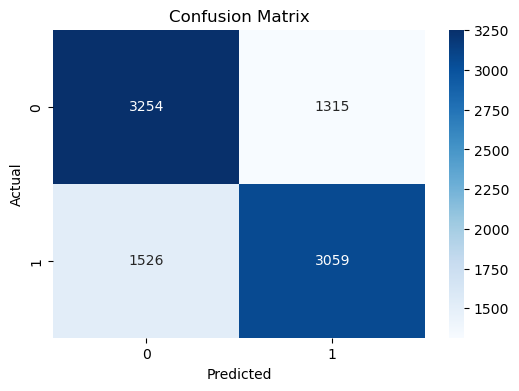

In [125]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr_tuned)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 5.4 Building KNN (K-Nearest Neighbours)

## 5.4.1 Apply KNN model

In [128]:
knn= KNeighborsClassifier(n_neighbors=5)

In [129]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [130]:
y_pred_knn_default = knn.predict(X_test)

In [131]:
print("KNN results")
print(classification_report(y_test, y_pred_knn_default))

KNN results
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      4569
           1       0.78      0.81      0.80      4585

    accuracy                           0.79      9154
   macro avg       0.79      0.79      0.79      9154
weighted avg       0.79      0.79      0.79      9154



## 5.4.2 Apply Stratified KFold to validate KNN model with default hyperparameters

In [133]:
n_folds = 5

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=38)

# Perform cross-validation
cv_results_knn = cross_val_score(knn, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation results
print("Cross-validation results:", cv_results_knn)

Cross-validation results: [0.77536529 0.78478766 0.79814258 0.77724665 0.79295275]


## 5.4.3 Find Optimal Hyperparameters using GridSearchCV

In [135]:
# Create the parameter grid
param_grid = {
    'n_neighbors': [5, 7, 9, 11, 15],     #
    'weights': ['uniform', 'distance'],      
    'metric': ['euclidean', 'manhattan'],  
    'p': [1, 2]                              
}

n_folds = 5
stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=38)

# Instantiate the GridSearchCV model
knn= KNeighborsClassifier()
knn_gridsearchcv = GridSearchCV(estimator = knn, param_grid = param_grid,
                          cv = stratified_kfold,n_jobs=-1)

# Fit the GridSearchCV to the data
knn_gridsearchcv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=38, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [136]:
print("Best Parameters:", knn_gridsearchcv.best_params_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [137]:
best_knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    metric='manhattan',
    p=1
)

best_knn.fit(X_train, y_train)
y_pred_knn_tuned = best_knn.predict(X_test)

In [138]:
print(classification_report(y_test, y_pred_knn_tuned))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4569
           1       0.83      0.86      0.85      4585

    accuracy                           0.85      9154
   macro avg       0.85      0.85      0.85      9154
weighted avg       0.85      0.85      0.85      9154



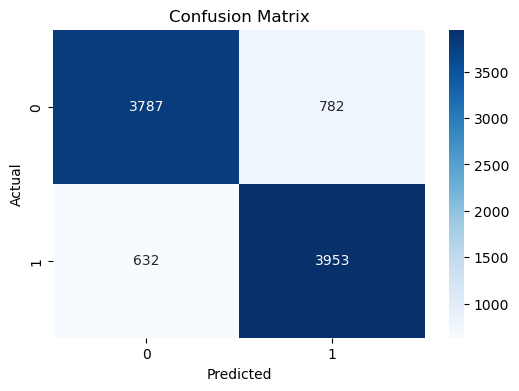

In [139]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn_tuned)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 5.5 Building Random Forest

## 5.5.1 Apply Random Forest 

In [142]:
# Running the random forest model
rfc = RandomForestClassifier()

In [143]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [144]:
# Making predictions
y_pred_rf_default = rfc.predict(X_test)

In [145]:
print("Random Forest results")
print(classification_report(y_test, y_pred_rf_default))

Random Forest results
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4569
           1       0.91      0.83      0.87      4585

    accuracy                           0.87      9154
   macro avg       0.88      0.87      0.87      9154
weighted avg       0.88      0.87      0.87      9154



## 5.5.2 Apply Stratified KFold to validate Random Forest model with default hyperparameters

In [147]:
# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=38)

# Perform cross-validation
cv_results_rfc = cross_val_score(rfc, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation results
print("Cross-validation results:", cv_results_rfc)

Cross-validation results: [0.8747781  0.87791889 0.88145315 0.8731221  0.88131658]


## 5.5.3 Find Optimal Hyperparameters using GridSearchCV

In [149]:
rf_params = {'n_estimators': [50,75],           # number of trees in the ensemble
             'max_depth': [70,80],              # maximum number of levels allowed in each tree.
             'min_samples_split': [2,5],        # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,4]} 

n_folds = 5
stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=38)

# Instantiate the GridSearchCV model
rfc_gridsearchcv = GridSearchCV(estimator = rfc, param_grid = rf_params,
                          cv = n_folds,verbose=2, n_jobs = -1) 

In [150]:
rfc_gridsearchcv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [70, 80], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 75]},
             verbose=2)

In [151]:
print("Best Parameters:", rfc_gridsearchcv.best_params_)

Best Parameters: {'max_depth': 80, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 75}


In [152]:
# Fit the model with optimal hyperparameters
rfc_best = RandomForestClassifier(bootstrap=True,
                             max_depth=70,
                             min_samples_leaf=3,
                             min_samples_split=2,
                             n_estimators=75)
rfc_best.fit(X_train,y_train)

# Accuracy score
print(f"The best accuracy using Ranfom Forest Classifier Model and GridSearchCV Tunning: {rfc_best.score(X_test,y_test)}.")

The best accuracy using Ranfom Forest Classifier Model and GridSearchCV Tunning: 0.8730609569587066.


In [153]:
y_pred_rf_tuned = rfc_best.predict(X_test)
# Print classification report
print(classification_report(y_test,y_pred_rf_tuned))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4569
           1       0.91      0.83      0.87      4585

    accuracy                           0.87      9154
   macro avg       0.88      0.87      0.87      9154
weighted avg       0.88      0.87      0.87      9154



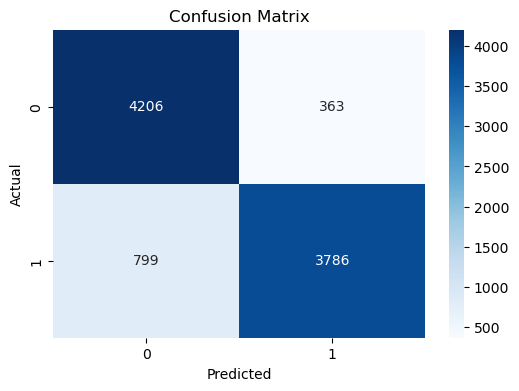

In [154]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf_tuned)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 5.6 Model Performance Evaluation

In [156]:
def evaluate_model(y_true, y_pred, model_name, version):
    return {
        'Model': model_name,
        'Version': version,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

In [157]:

results = []

# Logistic Regression
results.append(evaluate_model(y_test, y_pred_lr_default, 'Logistic Regression', 'Default'))
results.append(evaluate_model(y_test, y_pred_lr_tuned, 'Logistic Regression', 'Tuned'))

# KNN
results.append(evaluate_model(y_test, y_pred_knn_default, 'KNN', 'Default'))
results.append(evaluate_model(y_test, y_pred_knn_tuned, 'KNN', 'Tuned'))

# Random Forest
results.append(evaluate_model(y_test, y_pred_rf_default, 'Random Forest', 'Default'))
results.append(evaluate_model(y_test, y_pred_rf_tuned, 'Random Forest', 'Tuned'))

# Create a DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Version,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,Default,0.689644,0.699360,0.667176,0.682889
1,Logistic Regression,Tuned,0.689644,0.699360,0.667176,0.682889
2,KNN,Default,0.793205,0.783846,0.810687,0.797041
3,KNN,Tuned,0.845532,0.834847,0.862159,0.848283
4,Random Forest,Default,0.874372,0.911969,0.829226,0.868631
5,Random Forest,Tuned,0.873061,0.912509,0.825736,0.866957


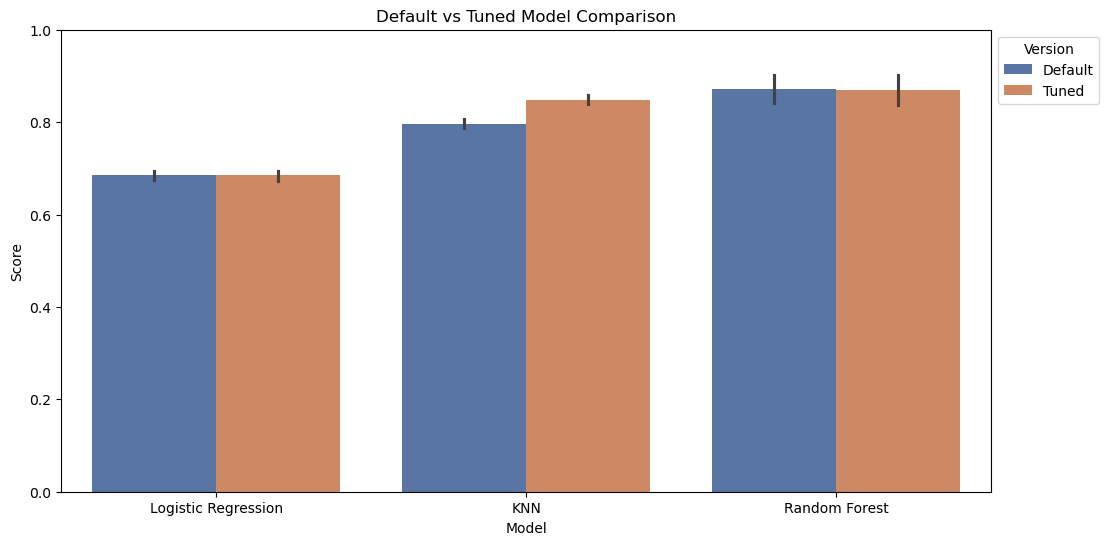

In [158]:
results_melted = results_df.melt(id_vars=['Model', 'Version'], var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Version', data=results_melted)
plt.title('Default vs Tuned Model Comparison')
plt.ylim(0, 1)
plt.legend(title='Version', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

## 6. Feature Importance Analysis

In [160]:
importances = rfc.feature_importances_

# Match importances to feature names
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [161]:
feature_importance_df.head(10)

,Feature,Importance
5,PAY_1,0.182480
3,MARRIAGE,0.092135
6,PAY_2,0.091809
1,SEX,0.086239
2,EDUCATION,0.072934
7,BILL_AMT1,0.065599
0,LIMIT_BAL,0.059479
4,AGE,0.058146
9,PAY_AMT2,0.053450
8,PAY_AMT1,0.052278


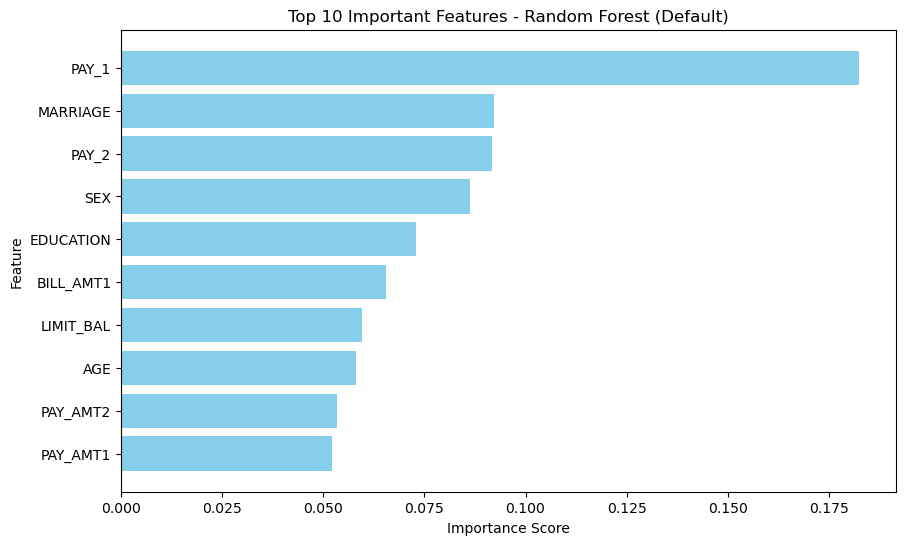

In [162]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'][:10][::-1], 
         feature_importance_df['Importance'][:10][::-1], 
         color='skyblue')
plt.title('Top 10 Important Features - Random Forest (Default)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

plt.show()

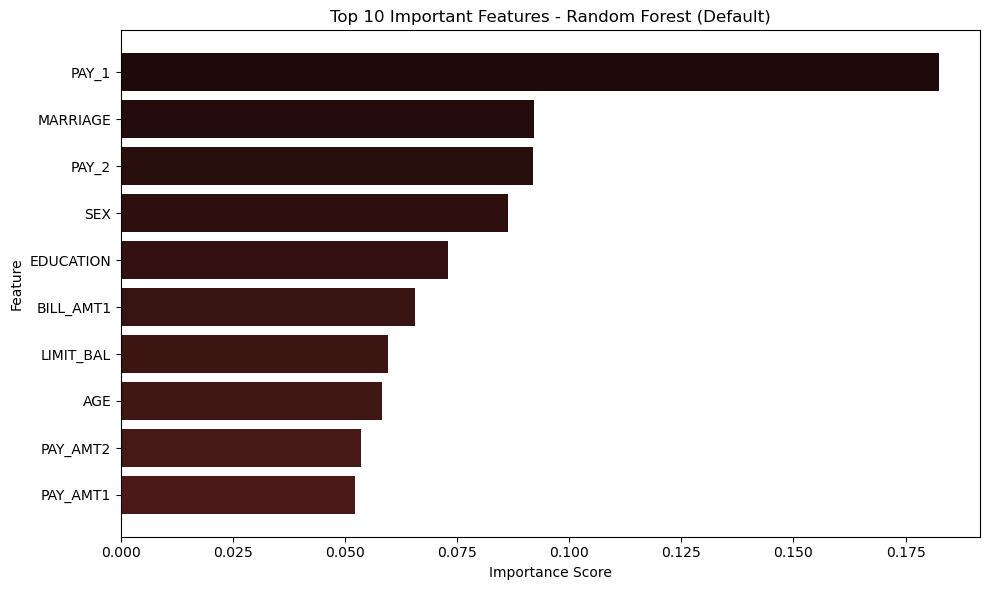

In [163]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Base color (brown)
base_color = "#4B1A18"

# Convert hex → RGB → numpy array
rgb = np.array(mcolors.to_rgb(base_color))

# Generate 10 progressively lighter colors
colors = [
    mcolors.to_hex(rgb * (0.4 + 0.6 * (i / 9)))
    for i in range(10)
]

plt.figure(figsize=(10,6))

plt.barh(
    feature_importance_df['Feature'][:10][::-1],
    feature_importance_df['Importance'][:10][::-1],
    color=colors[::-1]   # Fading effect
)

plt.title('Top 10 Important Features - Random Forest (Default)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()




## 7.Model Interpretation with Shapash

In [165]:
xpl =SmartExplainer(model=rfc)

In [166]:
shapsh_test = pd.DataFrame(X_test, columns=X.columns).iloc[:300, :]

shapsh_test.shape

(300, 14)

In [167]:
xpl.compile(x=shapsh_test)

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x000001F938E1BC50>


In [168]:
xpl

In [169]:
xpl.run_app(title_story='Tips dataset')

INFO:root:Your Shapash application run on http://YASSINE_LAPTOP:8050/
INFO:root:Use the method .kill() to down your app.


<CustomThread(Thread-6 (<lambda>), started 11308)>